#Worksheet - 4

#Library Importing

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

#optimizer model


📁 Loading from: /content/drive/MyDrive/Artificial intelligence and Machine learning/Week-4/DevanagariHandwrittenDigitDataset/Train
✅ Found classes: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
🔍 Class 'digit_0': 0 files
🔍 Class 'digit_1': 0 files
🔍 Class 'digit_2': 1810 files
🔍 Class 'digit_3': 0 files
🔍 Class 'digit_4': 201 files
🔍 Class 'digit_5': 1750 files
🔍 Class 'digit_6': 0 files
🔍 Class 'digit_7': 0 files
🔍 Class 'digit_8': 0 files
🔍 Class 'digit_9': 0 files
✅ Loaded 3761 images from '/content/drive/MyDrive/Artificial intelligence and Machine learning/Week-4/DevanagariHandwrittenDigitDataset/Train'


📁 Loading from: /content/drive/MyDrive/Artificial intelligence and Machine learning/Week-4/DevanagariHandwrittenDigitDataset/Test
✅ Found classes: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
🔍 Class 'digit_0': 350 files
🔍 Class 'digit_1': 300 files
🔍

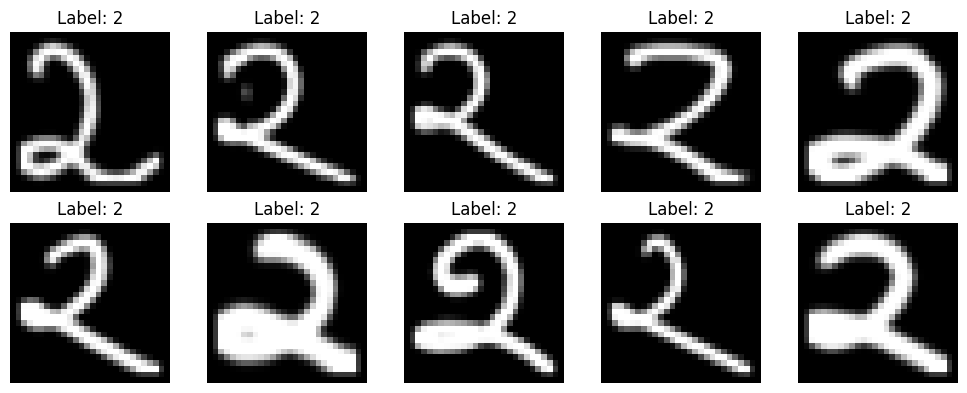

In [3]:
# Define dataset paths
train_dir = "/content/drive/MyDrive/Artificial intelligence and Machine learning/Week-4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Artificial intelligence and Machine learning/Week-4/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}

    print(f"\n📁 Loading from: {folder}")
    print("✅ Found classes:", class_names)

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        if not os.path.isdir(class_path):
            print(f"⚠️ Skipping non-directory: {class_path}")
            continue

        file_list = os.listdir(class_path)
        print(f"🔍 Class '{class_name}': {len(file_list)} files")

        for filename in file_list:
            img_path = os.path.join(class_path, filename)
            try:
                img = Image.open(img_path).convert("L")  # Grayscale
                img = img.resize((img_width, img_height))
                img = np.array(img) / 255.0
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"❌ Error loading {img_path}: {e}")

    print(f"✅ Loaded {len(images)} images from '{folder}'\n")
    return np.array(images), np.array(labels)

# Load datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Check if data loaded
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Proceed only if training data is not empty
if x_train.size > 0 and x_test.size > 0:
    # Reshape for CNN input
    x_train = x_train.reshape(-1, img_height, img_width, 1)
    x_test = x_test.reshape(-1, img_height, img_width, 1)

    # One-hot encode labels
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)

    # Print final shapes
    print(f"\n✅ Final Training Shape: {x_train.shape}, Labels: {y_train.shape}")
    print(f"✅ Final Testing Shape: {x_test.shape}, Labels: {y_test.shape}")

    # Visualize sample images
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {np.argmax(y_train[i])}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("❗ Training or Testing data not loaded properly. Check folder paths and contents.")

In [4]:
num_classes = 10
input_shape = (28*28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(),
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
optimizer="sgd",
loss="categorical_crossentropy",
metrics=["accuracy"]
)

In [7]:
x_train, y_train = shuffle(x_train, y_train, random_state=42)

batch_size = 128
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience = 4,),
]

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split = 0.15,
    callbacks=callbacks,
)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2077 - loss: 2.1544 - val_accuracy: 0.4779 - val_loss: 0.9834
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4749 - loss: 0.9780 - val_accuracy: 0.4761 - val_loss: 0.9165
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4814 - loss: 0.9342 - val_accuracy: 0.4761 - val_loss: 0.8951
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4846 - loss: 0.9126 - val_accuracy: 0.4761 - val_loss: 0.8840
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4749 - loss: 0.9081 - val_accuracy: 0.4761 - val_loss: 0.8770
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4836 - loss: 0.8959 - val_accuracy: 0.4761 - val_loss: 0.8737
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4925 - loss: 0.8766 - val_accuracy: 0.4761 - val_loss: 0.8697
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4662 - loss: 0.8951 - val_accuracy: 0.4761

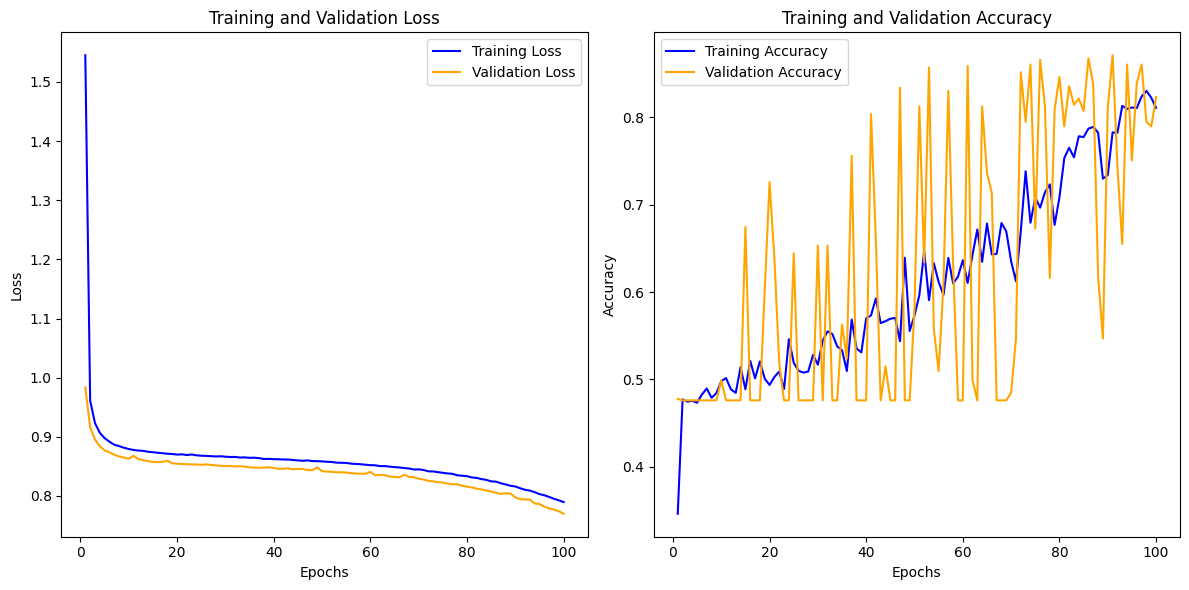

In [8]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


96/96 - 0s - 2ms/step - accuracy: 0.1676 - loss: 6.5745
Test Accuracy: 0.1676


In [10]:
model.save("devnagari_digit_classifier.h5")

loaded_model = tf.keras.models.load_model("devnagari_digit_classifier.h5")

test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded Model Test Accuracy: {test_acc:.4f}")


96/96 - 1s - 7ms/step - accuracy: 0.1676 - loss: 6.5745
Loaded Model Test Accuracy: 0.1676


In [11]:
predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 2
True label for first image: 0


#Optimizer Model

#Data Preparation

Training Data Shape: (3640, 784), Validation Shape: (910, 784), Test Shape: (3060, 784)
One-hot Encoded Labels Shape: (3640, 10)


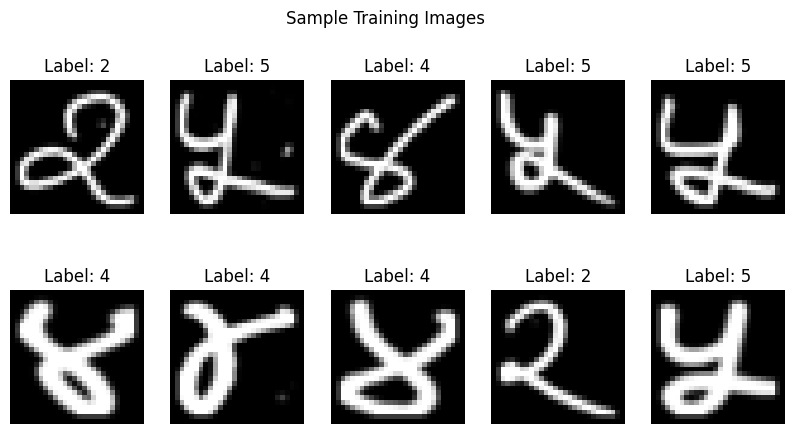

In [13]:
train_dir = "/content/drive/MyDrive/Artificial intelligence and Machine learning/Week-4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Artificial intelligence and Machine learning/Week-4/DevanagariHandwrittenDigitDataset/Test"

def load_images_from_folder(folder):
    images, labels = [], []
    classes = sorted(os.listdir(folder))
    class_map = {class_name: i for i, class_name in enumerate(classes)}

    for class_name in classes:
        class_folder = os.path.join(folder, class_name)
        if not os.path.isdir(class_folder):
            continue

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            try:
                img = Image.open(image_path).convert('L')
                img = img.resize((28, 28))
                img = np.array(img) / 255.0
                images.append(img)
                labels.append(class_map[class_name])
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    return np.array(images), np.array(labels)

x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training Data Shape: {x_train.shape}, Validation Shape: {x_val.shape}, Test Shape: {x_test.shape}")
print(f"One-hot Encoded Labels Shape: {y_train.shape}")

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
    ax.axis("off")

plt.suptitle("Sample Training Images")
plt.show()

#Task 2 -Fully Connected Neural Network Model building

In [14]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(28*28,)),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

#Task 3 - Model Compiling


In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Task 4 - Model training

In [16]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience = 4, restore_best_weights=True)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3203 - loss: 1.7025 - val_accuracy: 0.3874 - val_loss: 1.0346
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4796 - loss: 1.0179 - val_accuracy: 0.7060 - val_loss: 0.8559
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7740 - loss: 0.7695 - val_accuracy: 0.9478 - val_loss: 0.4517
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9324 - loss: 0.3835 - val_accuracy: 0.9753 - val_loss: 0.1817
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9710 - loss: 0.1713 - val_accuracy: 0.9794 - val_loss: 0.0976
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9779 - loss: 0.0975 - val_accuracy: 0.9849 - val_loss: 0.0716
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9877 - loss: 0.0606 - val_accuracy: 0.9849 - val_loss: 0.0587
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9900 - loss: 0.0491 - val_accuracy: 0.9876 - v

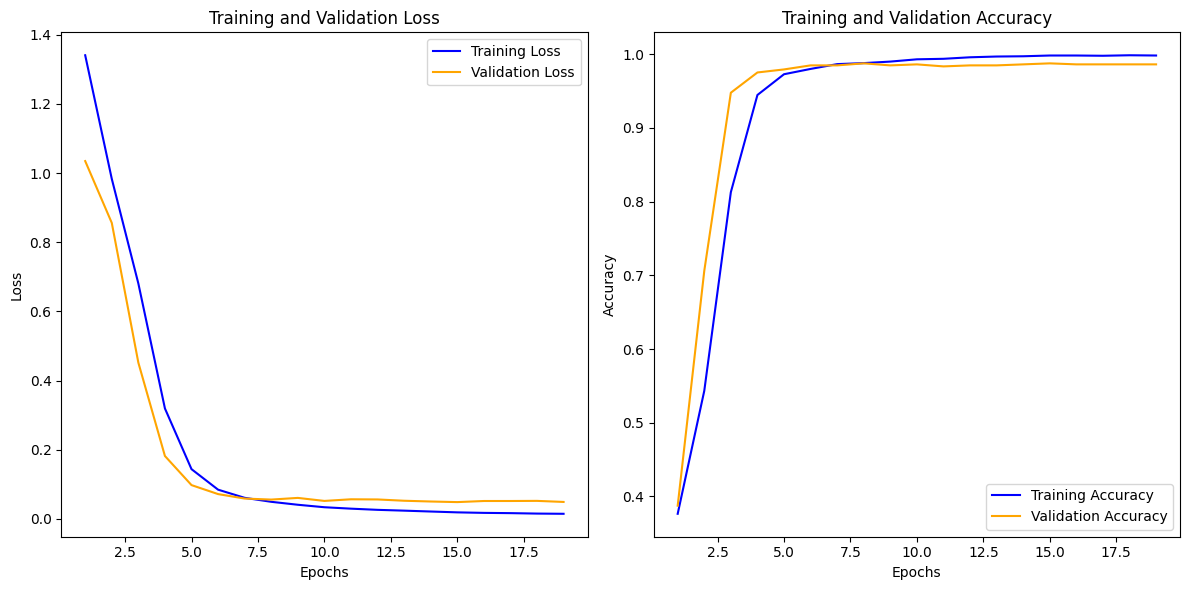

In [17]:
# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#Task 5 - Model Evaluation

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

96/96 - 0s - 5ms/step - accuracy: 0.2889 - loss: 7.7312
Test Accuracy: 0.2889
Test Loss: 7.7312


#Task 6 - Model loading

In [19]:
model.save("devnagari_digit_classifier.h5")
print("Model saved successfully as 'devnagari_digit_classifier.h5'!")

loaded_model = tf.keras.models.load_model("devnagari_digit_classifier.h5")
print("Model loaded successfully!")

test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded Model Test Accuracy: {test_acc:.4f}")
print(f"Loaded Model Test Loss: {test_loss:.4f}")

Model saved successfully as 'devnagari_digit_classifier.h5'!
Model loaded successfully!
96/96 - 1s - 8ms/step - accuracy: 0.2889 - loss: 7.7312
Loaded Model Test Accuracy: 0.2889
Loaded Model Test Loss: 7.7312


#Task 7 - Predictions making

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


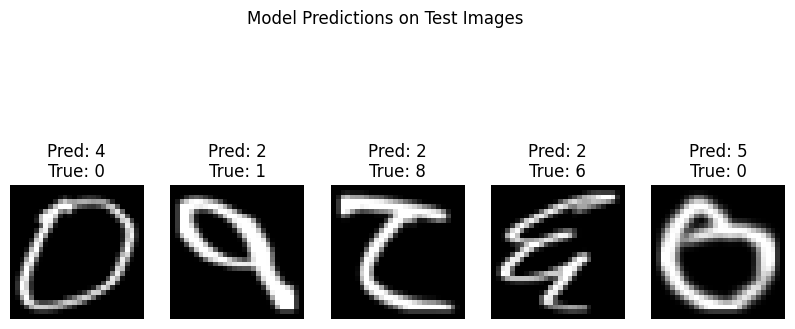

In [20]:
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

predictions = loaded_model.predict(sample_images)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis("off")

plt.suptitle("Model Predictions on Test Images")
plt.show()